In [15]:
import matplotlib.pyplot as plt
import ngboost as ngb
import numpy as np

In [46]:
def _generate_data(n=100, std=0.1):
    eps = std * np.random.randn(n)
    x = np.random.rand(n) * 2*np.pi
    y = np.sin(x) + eps
    return x, y


def generate_data(n=100, std=0.1):
    x1, y1 = _generate_data(n=n, std=std)
    x2, y2 = _generate_data(n=n, std=std)
    y2 = -y2
    return np.concatenate([x1, x2]).reshape(-1, 1), np.concatenate([y1, y2])

In [47]:
x, y = generate_data(std=0.01)

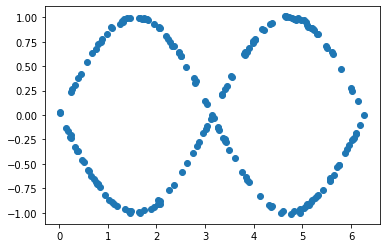

In [48]:
plt.scatter(x, y)
plt.show()

In [49]:
model = ngb.NGBRegressor()

In [50]:
model.fit(x, y)

[iter 0] loss=1.0922 val_loss=0.0000 scale=2.0000 norm=1.5291
[iter 100] loss=0.8465 val_loss=0.0000 scale=2.0000 norm=1.3017
[iter 200] loss=0.6958 val_loss=0.0000 scale=2.0000 norm=1.1774
[iter 300] loss=0.5669 val_loss=0.0000 scale=2.0000 norm=1.0779
[iter 400] loss=0.4823 val_loss=0.0000 scale=1.0000 norm=0.5115


NGBRegressor(random_state=RandomState(MT19937) at 0x7FB40DE52258)

In [94]:
x_sort = np.sort(x)

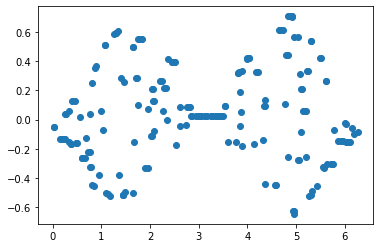

In [104]:
y_hat = model.predict(x_sort)

plt.scatter(x_sort, y_hat)
plt.show()

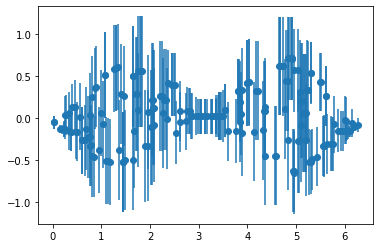

In [105]:
y_params = model.pred_param(x_sort)

plt.errorbar(x_sort, y_params[:, 0], yerr=np.exp(y_params[:, 1]), fmt='o')
plt.show()